In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [ ]:
# Adapted from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html

x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))

In [ ]:
print(x.shape)
print(y.shape)
print(pos.shape)
print(x[:5, :5])

In [ ]:
from matplotlib import colormaps
list(colormaps)

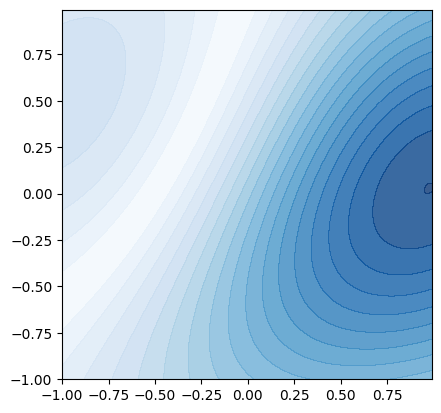

In [69]:
rv = multivariate_normal([1, 0.0], [[1.0, 0], [0, 1.0]])
rv2 = multivariate_normal([-0.1, 0.0], [[1.0, 0], [0, 1.0]])
rv3 = multivariate_normal([0.3, -0.3], [[1.0, 0.5], [0.5, 1.0]])

pdf_combined = 0.5 * rv.pdf(pos) - 0.5 * rv2.pdf(pos) + 0.5 * rv3.pdf(pos)
# The sum of two normal distribution is also a normal distribution
pdf_combined = np.abs(pdf_combined)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.contourf(x, y, pdf_combined, cmap='Blues', levels=20, alpha=0.8)
ax1.set_aspect('equal')

In [29]:
# print(type(rv))
pdf = rv.pdf(pos)
print(type(pdf))
print(pdf.shape)
print(pdf[:5, :5])
print(np.sum(pdf))

<class 'numpy.ndarray'>
(200, 200)
[[0.05854983 0.05913531 0.05972067 0.0603058  0.06089056]
 [0.05913531 0.05972664 0.06031786 0.06090883 0.06149945]
 [0.05972067 0.06031786 0.06091492 0.06151175 0.06210821]
 [0.0603058  0.06090883 0.06151175 0.06211442 0.06271673]
 [0.06089056 0.06149945 0.06210821 0.06271673 0.06332487]]
4660.594363099338


In [ ]:
# 1-D example
num_intervals = 100
mean_val = 0
cov_val = 0.5

x = np.linspace(-5, 5, num_intervals, endpoint=False)
y = multivariate_normal.pdf(x, mean=mean_val, cov=cov_val)
# print(y)
print(np.sum(y))

# entropy1 = multivariate_normal.entropy(mean=mean_val, cov=cov_val)
# print('entropy1:', entropy1)

probs = y / np.sum(y)
entropy2 = -np.sum(probs * np.log10(probs))
print('entropy:', entropy2)

# not the same as entropy1

In [ ]:
num_intervals = 100
mean_val = 0
x = np.linspace(-5, 5, num_intervals, endpoint=False)

for cov_val in [0.1,0.5,1.0]:
    y = multivariate_normal.pdf(x, mean=mean_val, cov=cov_val)
    probs = y / np.sum(y)
    entropy = -np.sum(probs * np.log10(probs))
    print(f'cov = {cov_val}, entropy = {entropy}')

In [ ]:
# simulate the summation of two PDFs
num_intervals = 100
x = np.linspace(-5, 5, num_intervals, endpoint=False)
y1 = multivariate_normal.pdf(x, mean=-2, cov=0.5)
y2 = multivariate_normal.pdf(x, mean=2, cov=0.5)
y_sum = y1 + y2

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(x, y_sum)
plt.show()

probs = y_sum / np.sum(y_sum)
entropy3 = -np.sum(probs * np.log10(probs))
print('entropy3:', entropy3)